In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carvideo/car_test.mp4
/kaggle/input/yolo-object/YOLO-Object-Detection-master/darknet.py
/kaggle/input/yolo-object/YOLO-Object-Detection-master/YOLO.ipynb
/kaggle/input/yolo-object/YOLO-Object-Detection-master/LICENSE
/kaggle/input/yolo-object/YOLO-Object-Detection-master/README.md
/kaggle/input/yolo-object/YOLO-Object-Detection-master/utils.py
/kaggle/input/yolo-object/YOLO-Object-Detection-master/weights/yolov3.weights
/kaggle/input/yolo-object/YOLO-Object-Detection-master/weights/.svn/format
/kaggle/input/yolo-object/YOLO-Object-Detection-master/weights/.svn/wc.db
/kaggle/input/yolo-object/YOLO-Object-Detection-master/weights/.svn/entries
/kaggle/input/yolo-object/YOLO-Object-Detection-master/weights/.svn/wc.db-journal
/kaggle/input/yolo-object/YOLO-Object-Detection-master/weights/.svn/pristine/69/692ebfd82cbf3fa799a39f75968509e0c1091c9d.svn-base
/kaggle/input/yolo-object/YOLO-Object-Detection-master/images/food.jpg
/kaggle/input/yolo-object/YOLO-Object-Detection-master

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
weights='/kaggle/input/yolo-object/YOLO-Object-Detection-master/weights/yolov3.weights'
configuration='/kaggle/input/yolo-object/YOLO-Object-Detection-master/cfg/yolov3.cfg'
labelsPath = '/kaggle/input/yolo-object/YOLO-Object-Detection-master/data/coco.names'
net=cv2.dnn.readNet(weights,configuration)

In [4]:
classes=[]
with open(labelsPath,'r') as f:
    classes=[line.strip() for line in f.readlines()]

print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [6]:
layer_names=net.getLayerNames()
output_layer=[layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
print(output_layer)

['yolo_82', 'yolo_94', 'yolo_106']


In [7]:
def plot_image(image):
    plt.figure(figsize=(18,15))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [8]:
def object_detect(img):
    (H, W) = img.shape[:2]
    #img=cv2.resize(img,None,fx=0.4,fy=0.4)
    blob=cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)
    net.setInput(blob)
    outs=net.forward(output_layer)

    class_ids=[]
    confidences=[]
    boxes=[]
    for out in outs:
        for detection in out:
            scores=detection[5:]
            class_id=np.argmax(scores)
            confidence=scores[class_id]
            if confidence>0.5:
                center_x=int(detection[0]*W)
                center_y=int(detection[1]*H)
                w=int(detection[2]*W)
                h=int(detection[3]*H)
                #cv2.circle(img,(center_x,center_y),10,(255,0,0),2)
                x = int(center_x - (w/2))
                y = int(center_y - (h/2))
                #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                boxes.append([x,y,w,h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
                
    
    font=cv2.FONT_HERSHEY_TRIPLEX
    confidenceThreshold=0.5
    NMSThreshold=0.4
    indexes=cv2.dnn.NMSBoxes(boxes, confidences, confidenceThreshold, NMSThreshold)
    
    for i in range(len(boxes)):
        if i in indexes:
            x,y,w,h=boxes[i]
            label=str(classes[class_ids[i]])
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(img,label,(x,y+30),font,1,(0,0,255),3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return img
            
    

# Test With an Image

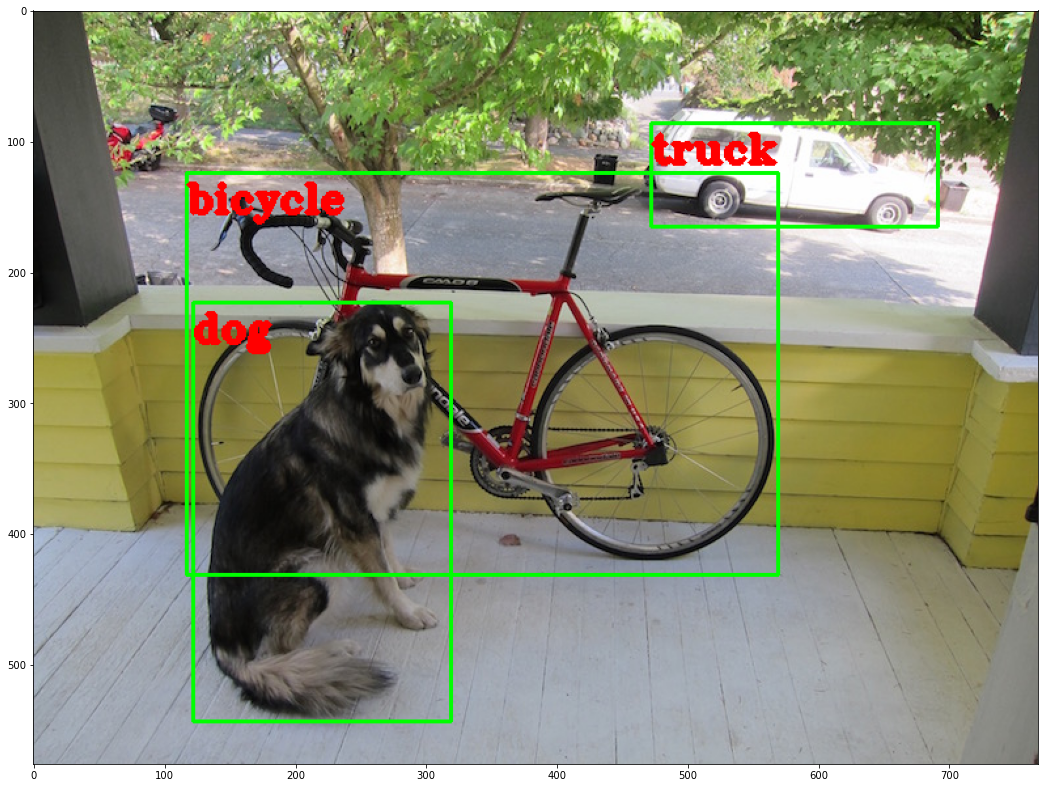

In [9]:
img=cv2.imread('/kaggle/input/yolo-object/YOLO-Object-Detection-master/images/dog.jpg')
img=object_detect(img)
plot_image(img)

# Test With a Video

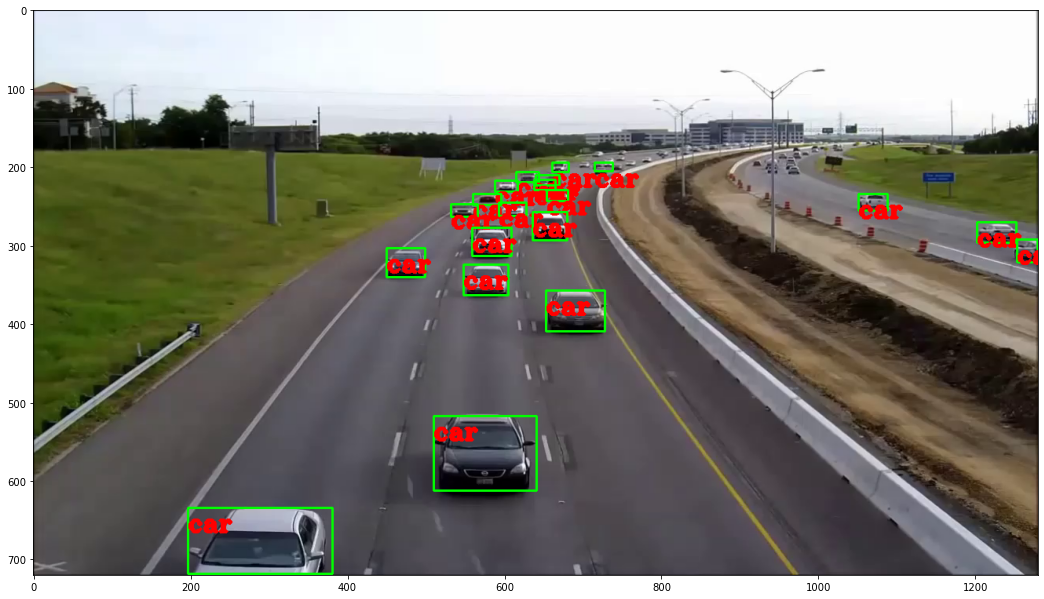

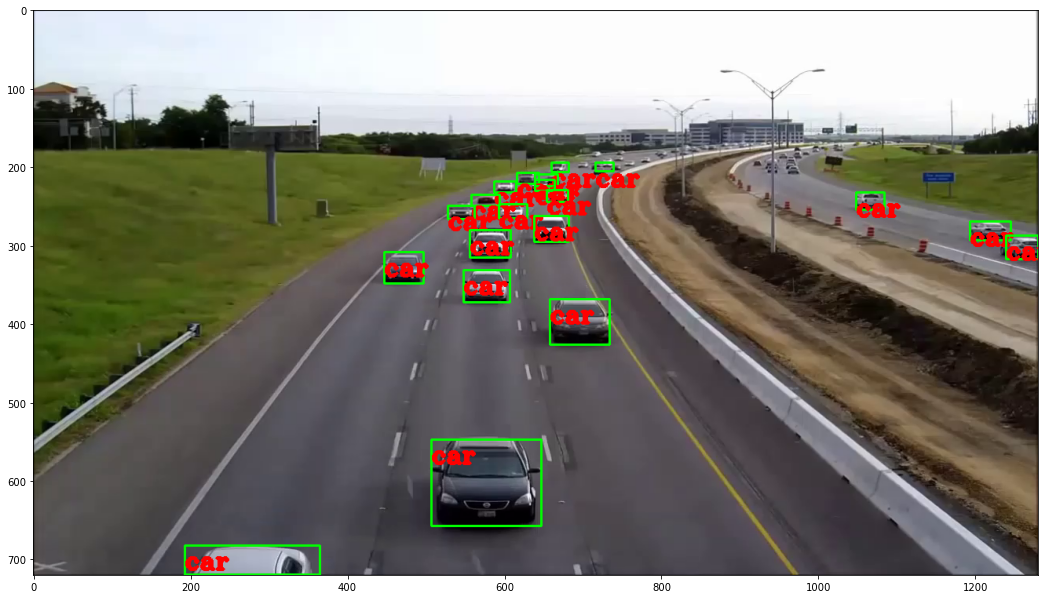

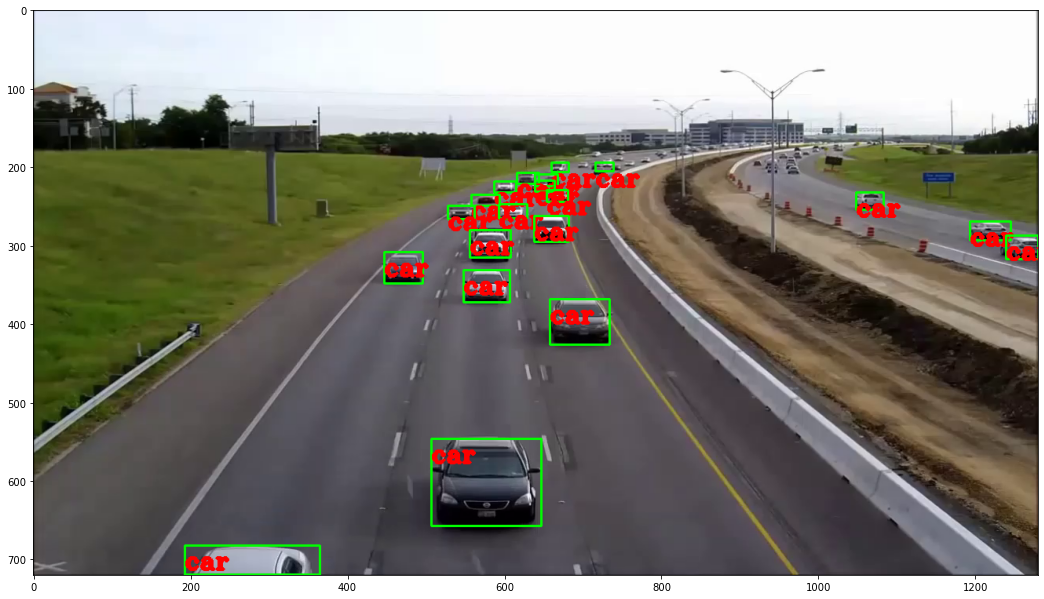

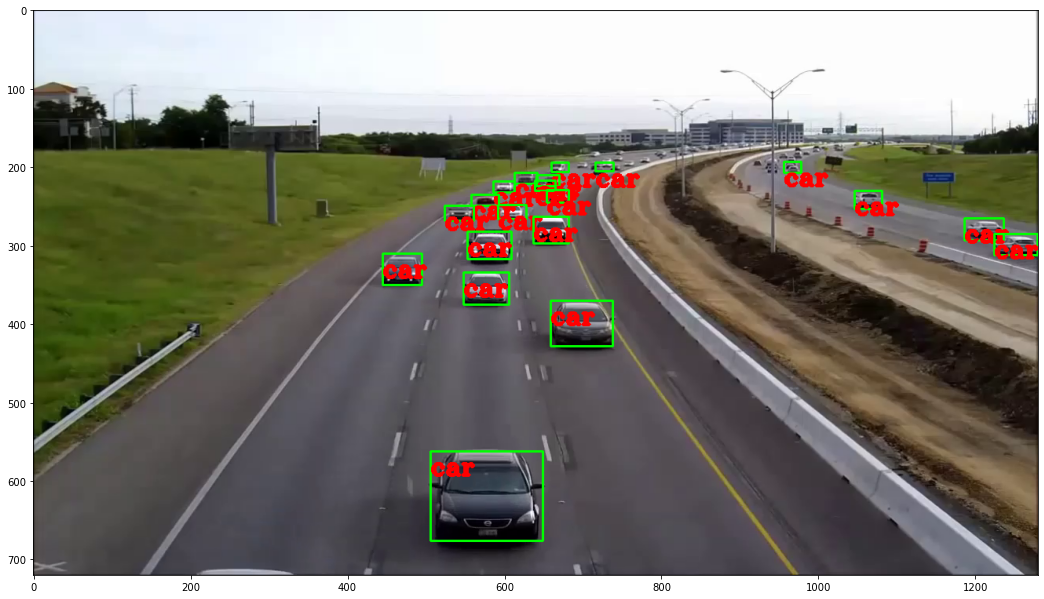

In [16]:
cap=cv2.VideoCapture('/kaggle/input/carvideo/car_test.mp4')
fourcc=cv2.VideoWriter_fourcc(*'XVID')
out=cv2.VideoWriter('output.avi',fourcc,15,(1280,720))
i=0
while cap.isOpened() and i<200:
    ret,frame=cap.read()
    frame=object_detect(frame)
    
    i+=1
    if i<5: 
        plot_image(frame)
        
    if ret==True:
        out.write(frame)
    else:
        pass
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
        
        
     

cv2.destroyAllWindows()
    
    

**Reference:**https://youtu.be/h56M5iUVgGs
**<br>
Video Source:**https://youtu.be/PJ5xXXcfuTc
